In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

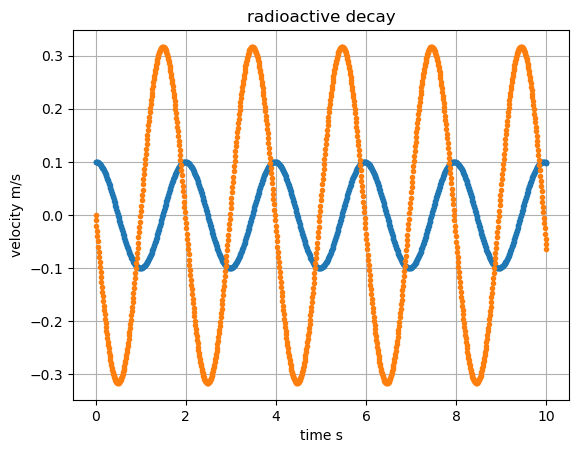

In [25]:
#1
npts = 1000 # Number of points
tmax = 10 # Maximum time

# setting up the time array:
t = np.linspace(0.0, tmax, npts)
def f(y,t):
    k=10
    m=1
    return[y[1],-(k/m*y[0])] #second equation
yinitial=[0.1,0] #two initial values
y=odeint(f,yinitial,t)

plt.plot(t, y,'.',)
plt.xlabel('time s')
plt.ylabel('displacement (m)')
plt.title('mass on spring ')

plt.grid()

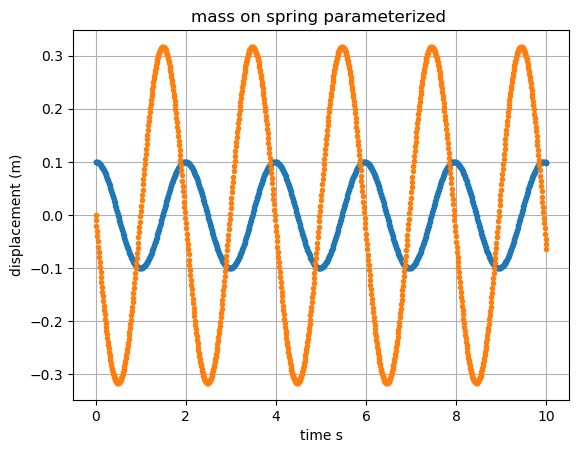

In [31]:
#b
k=10
m=1
def f(y,t,k,m):#added parameterds to function 
    
    return[y[1],-(k/m*y[0])] 
yinitial=[0.1,0] #two initial values
y=odeint(f,yinitial,t,args=(k,m))#using args passes parameters 
plt.plot(t, y,'.',)
plt.xlabel('time s')
plt.ylabel('displacement (m)')
plt.title('mass on spring parameterized ')
plt.grid()

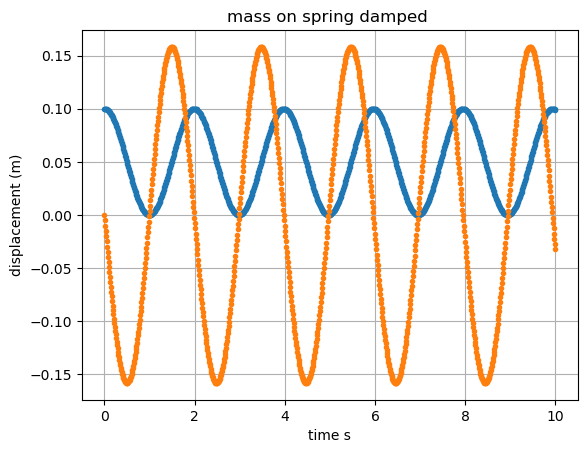

In [35]:
#c
k=10
m=1
b=0.5#damping coefficent 
def f(y,t,k,m,b):#added parameterds to function 
    
    return[y[1],-(k/m*y[0]-b/m)] 

y0=[0.1,0]
y=odeint(f,yinitial,t,args=(k,m,b))#using args passes parameters 
plt.plot(t, y,'.',)
plt.xlabel('time s')
plt.ylabel('displacement (m)')
plt.title('mass on spring damped ')
plt.grid()

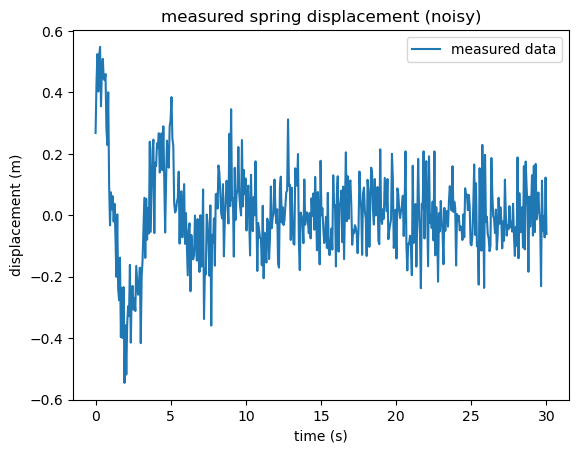

In [42]:
#d
from scipy.optimize import curve_fit
data = np.loadtxt("spring_measurement.txt")
t_data = data[:,0]
y_data = data[:,1]
plt.plot(t_data,y_data,label="measured data")
plt.xlabel("time (s)")
plt.ylabel("displacement (m)")
plt.title("measured spring displacement (noisy)")
plt.grid=(True)
plt.legend()

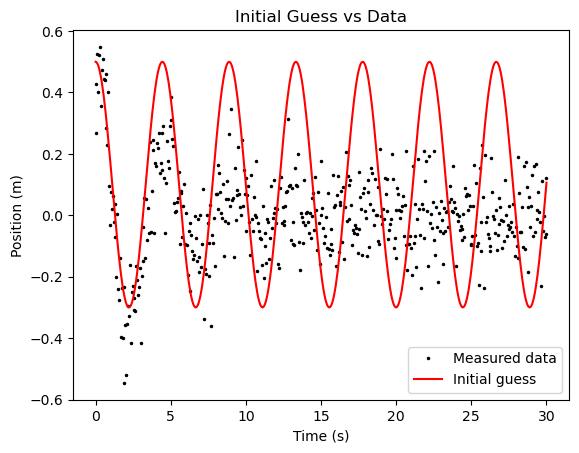

In [58]:
def spring_model(t,k,b):
    m=1 #mass is 1kg
    y0=[0.5,0] #y0moved 0.5m
    def f(y,t,k,m,b):
        return[y[1],-(k/m*y[0]-b/m)]
    y=odeint(f,y0,t,args=(k,m,b))#using args passes parameters 
    return y[:, 0]
#choose guess and plot prediction 
p0=[2,0.2]
y_guess=spring_model(t_data,*p0)

plt.plot(t_data, y_data, 'k.', markersize=3, label="Measured data")
plt.plot(t_data, y_guess, 'r-', label=f"Initial guess")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Initial Guess vs Data")

plt.legend()
plt.show()

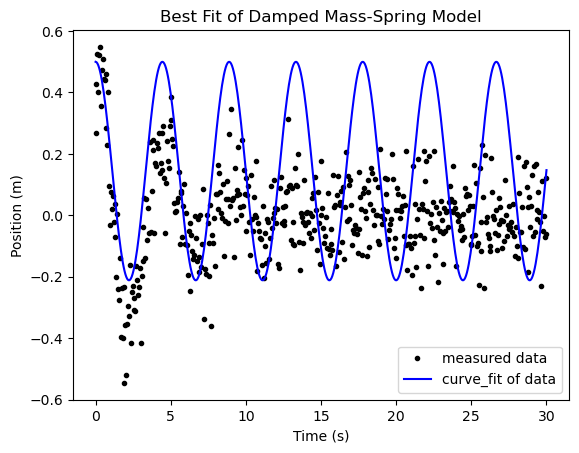

In [62]:
#use curve fit
popt,pcov=curve_fit(spring_model,t_data,y_data,p0=p0)
k_fit,b_fit=popt

y_fit=spring_model(t_data,k_fit,b_fit)

plt.plot(t_data,y_data,"k.",label="measured data")
plt.plot(t_data,y_fit,"b-",label="curve_fit of data")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Best Fit of Damped Mass-Spring Model")

plt.legend()
plt.show()

In [64]:
#finding K and b
print("Estimated k:", k_fit)
print("Estimated b:", b_fit)

Estimated k: 1.9994081984076162
Estimated b: 0.2881325086850442


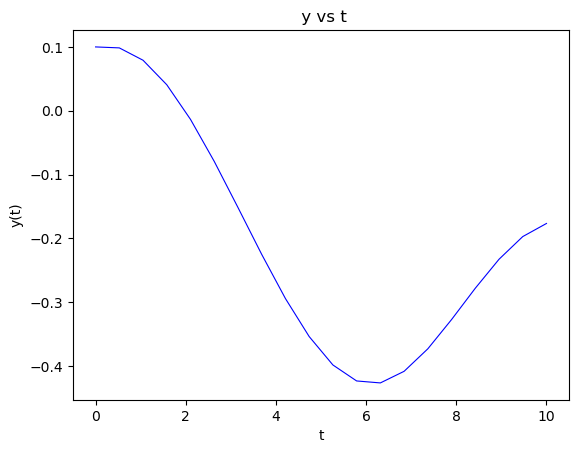

In [96]:
#exercise 2 
#parameters
m=8
A=1
omega=0.6

def f(y,t,m,A,omega):
    y,yp=y
    dydt=yp
    dypt=-m*(1-y**2)*yp+y-A*np.sin(omega*t)
    return [dydt,dypt]

t=np.linspace(0,10,20)#time

#initial conditions 
y0=[0.1,0]
#solve ode
ODE=odeint(f,y0,t,args=(m,A,omega))
y = ODE[:,0]
yp = ODE[:,1]

plt.plot(t, y, 'b-', linewidth=0.8)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title(" y vs t")

plt.show()

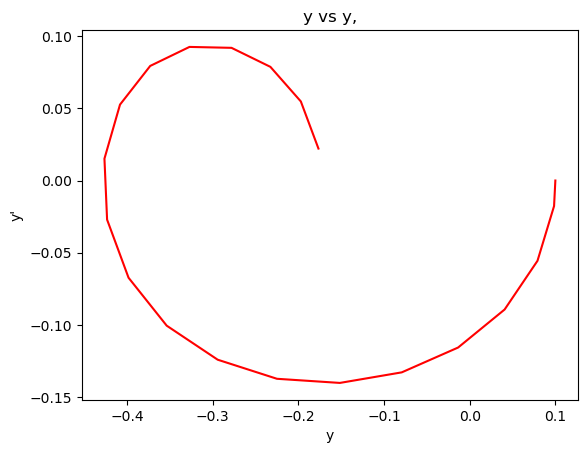

In [102]:
#phase portrait

plt.plot(y, yp, 'r-')
plt.xlabel("y")
plt.ylabel("y'")
plt.title("y vs y,")
plt.show()